Data Analysis – Advanced Statistics with Python  
Dr. Julia Jerke | HS 2021


# Exercise sheet 4 – November 12, 2021


**Please submit your solution electronically until November 26, 2021, 23:59  
Send your script-file to jerke@soziologie.uzh.ch**


**Notes:**  
- **Please sufficiently comment your script and structure it according to the different tasks.**
- **Whenever a task asks for an explicit answer, please write down your answer directly in the script within a comment.**
- **Make sure that you fully document your solution in your script. If you give an answer, but there is no code to clearly reconstruct how the answer was determined, the answer cannot be counted.**
- **The tasks vary in difficulty. For some of them you may have to combine commands in a new way or have to look in the documentation of the respective libraries.**
- **Most exercise sheets will contain bonus questions, providing the possibility to obtain extra points.**
- **The solution of this sheet will be published on OLAT after the submission deadline expires.**

---
---

### 1. For this exercise we will be working with the voting data set. Load it into python.


In [4]:
import pandas as pd

voting = pd.read_csv("voting.csv")

voting.head()

,Unnamed: 0,year,bula,west,sex,birthyear,eligible,media,corruption,performance,...,intdauer_ges,male,age,firstvote_afd,secondvote_afd,merkel,education,university,corruption_dummy,performance_dummy
0,0,2017.0,1.0,1.0,1.0,1960.0,1.0,3.0,1.0,2.0,...,95.900000,1.0,57.0,0,0.0,1.0,1.0,0.0,1.0,0.0
1,1,2017.0,1.0,1.0,1.0,1964.0,1.0,2.0,3.0,2.0,...,87.283333,1.0,53.0,0,0.0,0.0,2.0,1.0,0.0,0.0
2,2,2017.0,1.0,1.0,2.0,1953.0,1.0,1.0,2.0,2.0,...,123.966667,0.0,64.0,0,0.0,1.0,2.0,0.0,1.0,0.0
3,3,2017.0,1.0,1.0,1.0,1939.0,1.0,1.0,4.0,2.0,...,85.966667,1.0,78.0,0,NaN,1.0,2.0,1.0,0.0,0.0
4,4,2017.0,1.0,1.0,2.0,2001.0,0.0,2.0,3.0,2.0,...,75.233333,0.0,16.0,0,NaN,1.0,1.0,0.0,0.0,0.0


### 2. We want to explore the left-right self-assessment of the respondents.

1. Plot a histogram for the left-right self-assessment. Choose an appropiate title and appropriate axis-labels.
2. Group the histogram by gender. Have a look at this example for that: https://matplotlib.org/stable/gallery/statistics/histogram_multihist.html#sphx-glr-gallery-statistics-histogram-multihist-py

**1. Plot a histogram for the left-right self-assessment. Choose an appropiate title and appropriate axis-labels**

In [2]:
import matplotlib.pyplot as plt

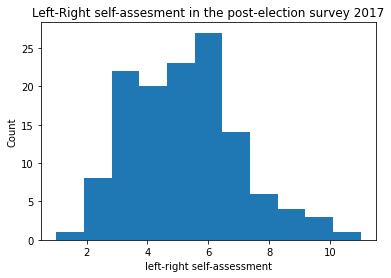

In [161]:
fig, ax = plt.subplots()
ax.hist(voting.leftright,bins=11)
ax.set_title("Left-Right self-assesment in the post-election survey 2017")
ax.set_xlabel("left-right self-assessment")
ax.set_ylabel("Count");

In [164]:
voting.leftright.value_counts().sort_index()

1.0      1
2.0      8
3.0     22
4.0     20
5.0     23
6.0     27
7.0     14
8.0      6
9.0      4
10.0     3
11.0     1
Name: leftright, dtype: int64

**2. Group the histogram by gender.**

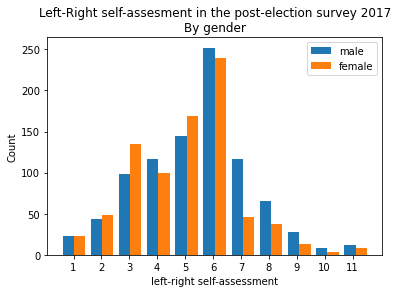

In [155]:
# Creating the two different series for male and female respondents
voting_male = voting[voting.male==1].leftright.dropna()
voting_female = voting[voting.male==0].leftright.dropna()

# Zipping the two series in one list and defining labels for the two groups
voting_by_gender=[voting_male,voting_female]
labels_gender = ["male","female"]

# Plotting the figure
fig, ax = plt.subplots()
ax.hist(voting_by_gender,label=labels_gender,histtype="bar",bins=11,align="right")
ax.legend()
ax.set_title("Left-Right self-assesment in the post-election survey 2017\nBy gender")
ax.set_xlabel("left-right self-assessment")
ax.set_ylabel("Count")
ax.set_xticks([1.9,2.8,3.7,4.6,5.5,6.4,7.3,8.2,9.1,10,10.9]);
ax.set_xticklabels(list(range(1,12)));

### 3. We are interested in whether the voting behavior differs between East and West Germany. 

1. Calculate a crosstab so see how many people voted for which party in East and West Germany. Use the variable `secondvote` for the voting behavior. Design the table in such way that percentages are shown and that you see the relative distribution within each group (East vs. West).
2. Plot the results in a grouped bar chart. The different parties should be indicated on the x-axis and we need bars each, one for East and one for West Germany. Do not forget to add a legend.

**1. Calculate a crosstab so see how many people voted for which party in East and West Germany. Use the variable secondvote for the voting behavior. Design the table in such way that percentages are shown and that you see the relative distribution within each group (East vs. West).**

In [6]:
tab = pd.crosstab(voting.west,voting.secondvote,margins=True,normalize="index")
display(tab)

secondvote,1.0,4.0,5.0,6.0,7.0,322.0,801.0
west,,,,,,,
0.0,0.264529,0.178357,0.098196,0.080160,0.194389,0.136273,0.048096
1.0,0.316248,0.209865,0.120890,0.161509,0.075435,0.076402,0.039652
All,0.299413,0.199609,0.113503,0.135029,0.114155,0.095890,0.042401


**2. Plot the results in a grouped bar chart. The different parties should be indicated on the x-axis and we need bars each, one for East and one for West Germany. Do not forget to add a legend.**

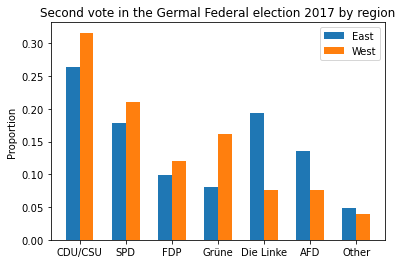

In [176]:
import numpy as np

# Storing the data
second_vote_east = list(tab.iloc[0])
second_vote_west = list(tab.iloc[1])

# Storing the labels
second_vote_labels = ["CDU/CSU","SPD","FDP","Grüne","Die Linke","AFD","Other"]

# Preparing the ticks and the bins
x = np.arange(len(second_vote_labels))
width = 0.3

# Creating the figure
fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, second_vote_east, width=width, label='East')
bar2 = ax.bar(x + width/2, second_vote_west, width=width, label='West')

# Customizing the plot
ax.set_xticks(x)
ax.set_xticklabels(second_vote_labels)
ax.legend()
ax.set_title("Second vote in the Germal Federal election 2017 by region")
ax.set_ylabel("Proportion");

### 4. We want to know more about the perception of the respondents regarding current problems.

1. We are interested in the variables _q78_ (_taxes_), _q79_ (_immigration_) and _q80_ (_climate_). Draw boxplots showing the distribution of the answers in one figure . **Note**: boxplots will only be drawn if you exclude all missing values before (hint: `dropna()`)
2. Let´s do some editing: rotate the boxplots in horizontal position and add appropriate title, xlabel and the names of the three variables to y axis.
3. [Bonus] You may have noticed that it is not so easy to decide for a good xlabel since the three variables have a different meaning and a different scale. Therefore, we want to draw three separate boxplots allowing for separate xlabels. For that we need to draw three _axes_ in one figure and draw a boxplot for each one of the three variables in one _axes_ each. Have a look in the _matplotlib_ documentation to see how we can draw several plots in one figure, crucial point is to define more than one _axes_ (note: in the lecture we were always working with just one _axes_).



**1. We are interested in the variables q78 (taxes), q79 (immigration) and q80 (climate). Draw boxplots showing the distribution of the answers in one figure.**

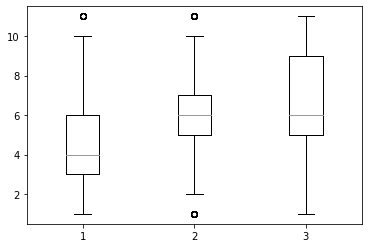

In [8]:
#Selecting the data for the boxplot
data = voting[["climate","taxes","immigration"]].dropna() #,np.array(voting.immigration)]

# Creating the boxplots
fig, ax = plt.subplots()
ax.boxplot(data);

**2. Let´s do some editing: rotate the boxplots in horizontal position and add appropriate title, xlabel and the names of the three variables to the y axis.**

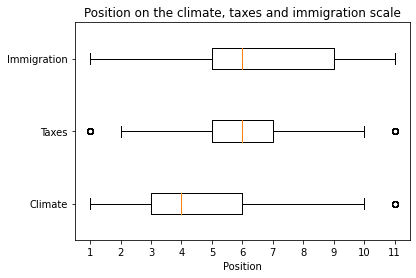

In [9]:
# Defining the labels
variables=["Climate","Taxes","Immigration"]

# Creating the boxplots
fig, ax = plt.subplots()
ax.boxplot(data,vert=False)

# Customizing the figure
ax.set_yticks([1,2,3])
ax.set_yticklabels(variables)
ax.set_xticks(range(1,12))
ax.set_xlabel("Position")
ax.set_title("Position on the climate, taxes and immigration scale");

**3. [Bonus] You may have noticed that it is not so easy to decide for a good xlabel since the three variables have a different meaning and a different scale. Therefore, we want to draw three separate boxplots allowing for separate xlabels. For that we need to draw three _axes_ in one figure and draw a boxplot for each one of the three variables in one _axes_ each.**

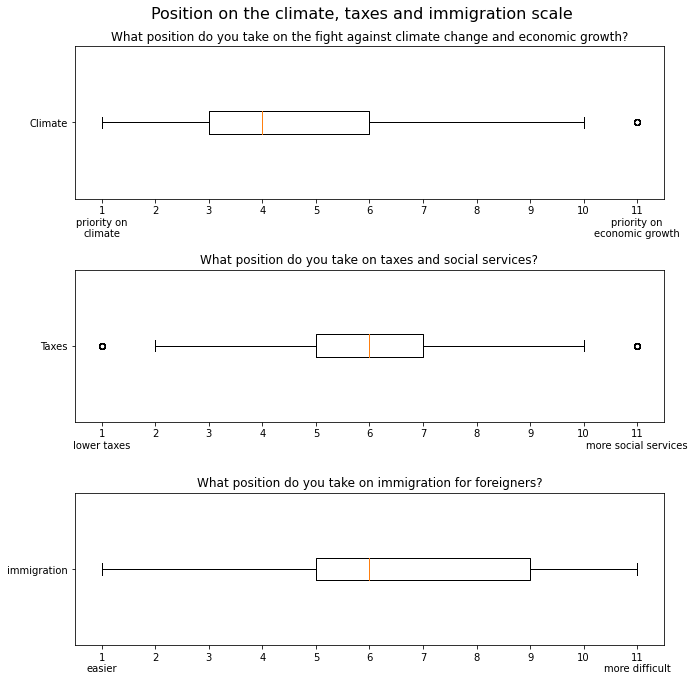

In [10]:
# Selecting the data
box1 = data["climate"]
box2 = data["taxes"]
box3 = data["immigration"]

label1 = ["1\npriority on\nclimate","2","3","4","5","6","7","8","9","10","11\npriority on\neconomic growth"]
label2 = ["1\nlower taxes","2","3","4","5","6","7","8","9","10","11\nmore social services"]
label3 = ["1\neasier","2","3","4","5","6","7","8","9","10","11\nmore difficult"]

# Creating the labels


# Creating a figure with 3 axes
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(10,10))
#fig, (ax1, ax2, ax3) = plt.subplots(3,1, constrained_layout=True, sharey=True)
fig.tight_layout(pad=5.0)

# Boxplot for climate
ax1.boxplot(box1,vert=False)
ax1.set_yticklabels(["Climate"])
ax1.set_xticks(range(1,12))
ax1.set_xticklabels(label1)
ax1.set_title("What position do you take on the fight against climate change and economic growth?")


# Boxplot for taxes
ax2.boxplot(box2,vert=False)
ax2.set_yticklabels(["Taxes"])
ax2.set_xticks(range(1,12))
ax2.set_xticklabels(label2)
ax2.set_title("What position do you take on taxes and social services?")


# Boxplot for immigration
ax3.boxplot(box3,vert=False)
ax3.set_yticklabels(["immigration"])
ax3.set_xticks(range(1,12))
ax3.set_xticklabels(label3)
ax3.set_title("What position do you take on immigration for foreigners?");


# Customizing the figure
fig.suptitle("Position on the climate, taxes and immigration scale",fontsize=16);

### 5. [Bonus] Recreate the following figure for the voting data set

See the matplotlib documentation: https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html#sphx-glr-gallery-lines-bars-and-markers-horizontal-barchart-distribution-py

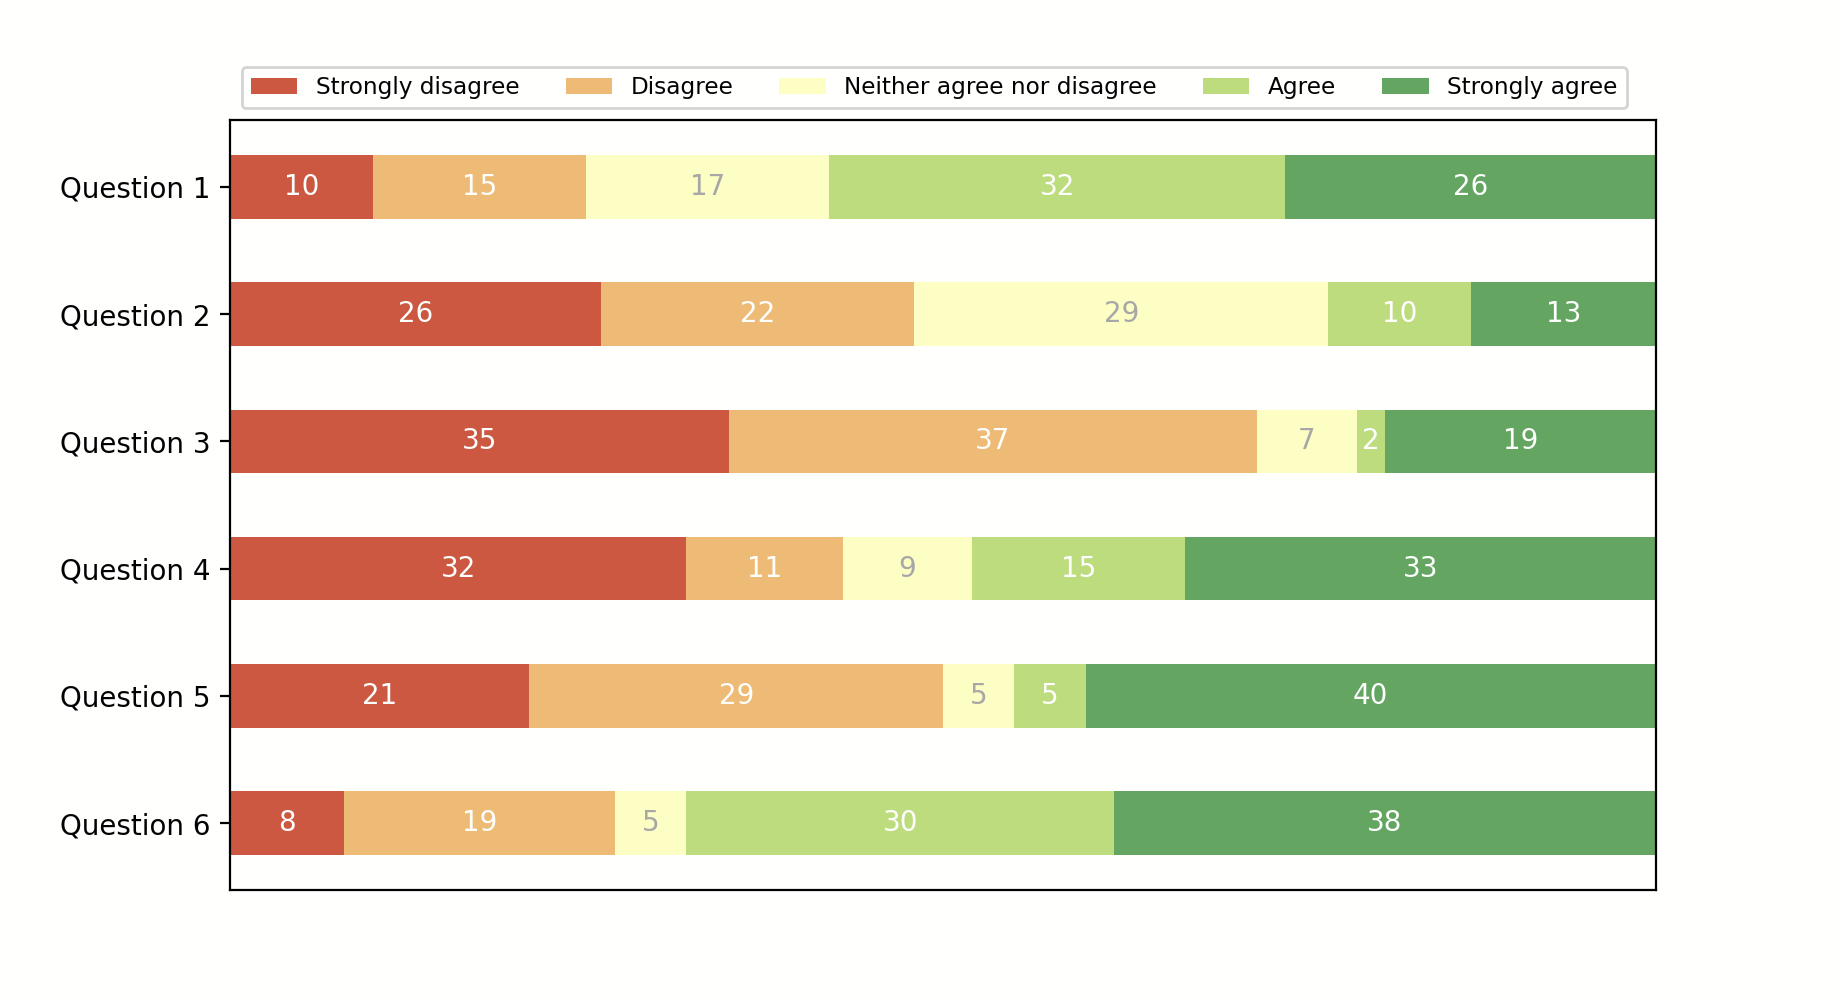

Recreate that figure for the item battery asking about fears and emotions. The items (A) to (F) would then replace Question 1 to 6.

**q73a-f: Emotions: fear, intensity**  
**Question text: Now, let’s turn to something entirely different. How worried are you about ...**  

Items:  
(A) refugee crisis?   
(B) Gbal warming?  
(C) international terrorism?  
(D) globalisation?  
(E) political developments in Turkey?  
(F) the use of nuclear power?  

The answering scale is from _1 - Not worried at all_ to _7 - Very worried_

In [113]:
# Preparing the data for the figure
refugees = (voting.refugees.value_counts(normalize=True).sort_index()*100).round(1)
warming = (voting.warming.value_counts(normalize=True,sort=False).sort_index()*100).round(1)
terrorism = (voting.terrorism.value_counts(normalize=True,dropna=True).sort_index()*100).round(1)
globalisation = (voting.globalisation.value_counts(normalize=True,sort=False).sort_index()*100).round(1)
turkey = (voting.turkey.value_counts(normalize=True,sort=False).sort_index()*100).round(1)
nuclear = (voting.nuclear.value_counts(normalize=True,sort=False).sort_index()*100).round(1)

In [114]:
# Preparing labels and storing the data
category_names = ['1 - not worried at all', '2',
                  '3', '4', '5','6','7 - very worried']

results = {
    'Refugee crisis': list(refugees),
    'Global warming': list(warming),
    'International terrorism': list(terrorism),
    'Globalisation': list(globalisation),
    'Political developments in Turkey': list(turkey),
    'Use of nuclear power': list(nuclear)
}

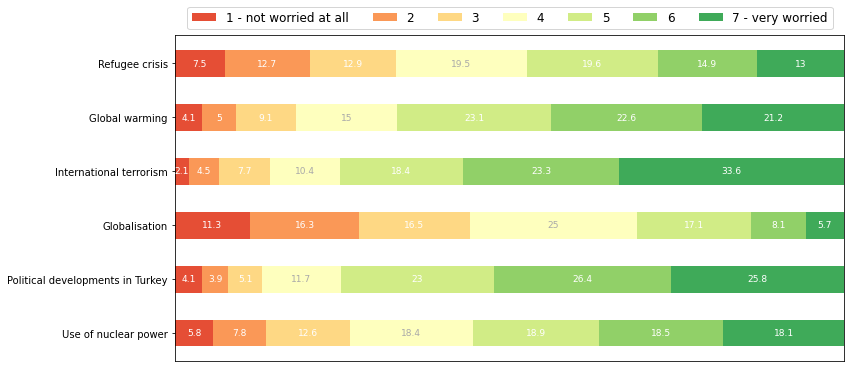

In [175]:
def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color,fontsize=9)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0.01, 1),
              loc='lower left', fontsize=12)

    return fig, ax


survey(results, category_names)
plt.show()

### 6. [Bonus] Create a figure of you choice!

This exercise is meant to give you the opportunity to explore the possibilities that _matplolib_ offers.

**Be creative! Try something out!**

You can work with any variable(s) from any data set that we have worked with (i.e., dogs, happiness, voting, covid-survey) and any kind of figure. You might find some inspiration an the _matplotlib_ example gallery: https://matplotlib.org/stable/gallery/index.html

I will collect all your graphs and the respctive code in one jupyter notebook for you to share. In the end you will therefore have a small collection of creative ways to visualize data.

_Pssst!_ Besides bonus points for this exercise, there might be a small prize for the coolest figure ;-)